# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [2]:
# Define the col names for the iris dataset
col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

url = 'Iris.csv'
# Load the dataset from URL
iris_df = pd.read_csv(url)
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Exploring the content of the data set

Get a general 'feel' of the data


In [3]:
# Display the first few rows of the dataframe
print(iris_df.head())

# Get summary statistics of the dataframe
print(iris_df.describe(include='all'))

# Check for missing values
print(iris_df.isnull().sum())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count   150.000000     150.000000    150.000000     150.000000    150.000000   
unique         NaN            NaN           NaN            NaN           NaN   
top            NaN            NaN           NaN            NaN           NaN   
freq           NaN            NaN           NaN            NaN           NaN   
mean     75.500000       5.843333      3.054000       3.758667      1.198667   
std      43.445368       0.828066      0.433594       1.76

# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [5]:
# Number of times that each distinct value occurs in each column of the iris_df DataFrame
print(iris_df['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [6]:
# Proportion of each distinct value of 'Speciess' in the data set

flower_proportions = iris_df['Species'].value_counts(normalize=True)
print(flower_proportions)




Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [8]:
total_observations = iris_df.shape[0]
# total number of null observations in Age
null_observations_age = iris_df['SepalLengthCm'].isnull().sum()
print(f'Total number of null observations in SepalLengthCm: {null_observations_age}')

# Total number of counts in Age (excluding missing values)
total_counts_age = iris_df['SepalLengthCm'].count()
print(f'Total number of counts in SepalLengthCm (excluding missing values): {total_counts_age}')

print(f'Total number of observations: {total_observations}')

Total number of null observations in SepalLengthCm: 0
Total number of counts in SepalLengthCm (excluding missing values): 150
Total number of observations: 150


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

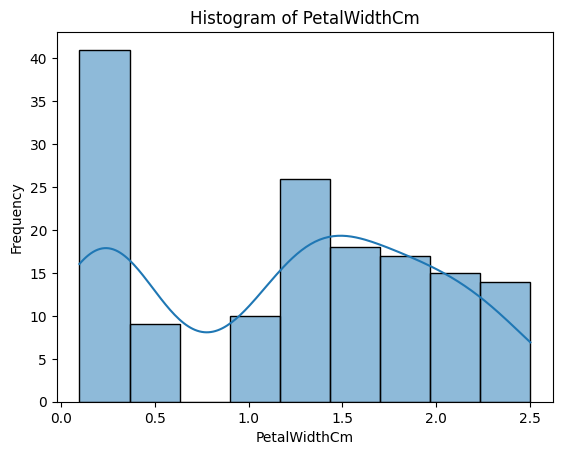

In [11]:
# Plot histogram for the PetalWidthCm column
sns.histplot(iris_df['PetalWidthCm'], kde=True)
plt.xlabel('PetalWidthCm')
plt.ylabel('Frequency')
plt.title('Histogram of PetalWidthCm')
plt.show()


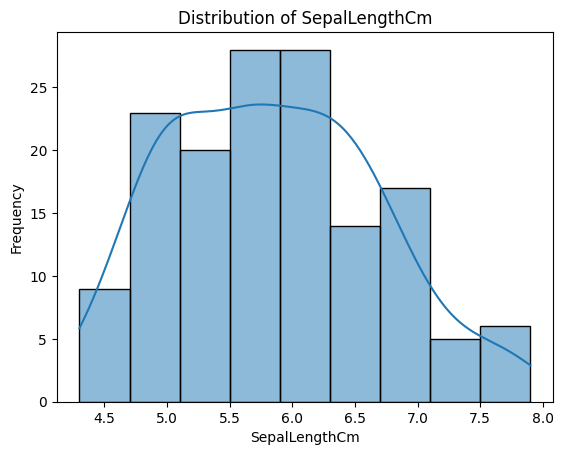

In [12]:
# Plot distribution of the SepalLengthCm column
sns.histplot(iris_df['SepalLengthCm'], kde=True)
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.title('Distribution of SepalLengthCm')
plt.show()



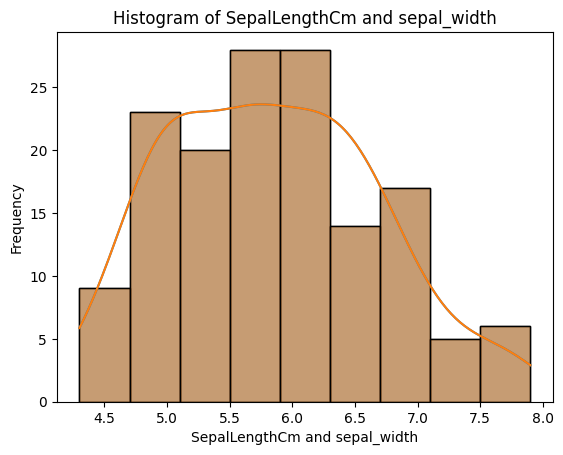

In [14]:
# Plot histogram of both the SepalLengthCm and SepalWidthCm columns
sns.histplot(iris_df['SepalLengthCm'], kde=True)
sns.histplot(iris_df['SepalLengthCm'], kde=True)
plt.xlabel('SepalLengthCm and SepalWidthCm')
plt.ylabel('Frequency')
plt.title('Histogram of SepalLengthCm and SepalWidthCm')
plt.show()





# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

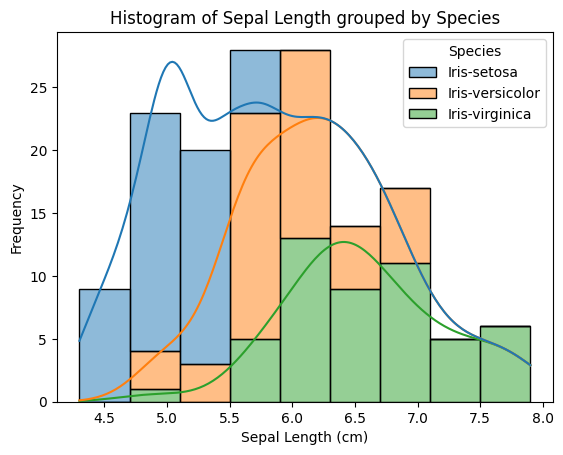

In [15]:
# Create histograms of the "SepalLengthCm" grouped by "Species"
sns.histplot(data=iris_df, x='SepalLengthCm', hue='Species', multiple='stack', kde=True)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length grouped by Species')
plt.show()




# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

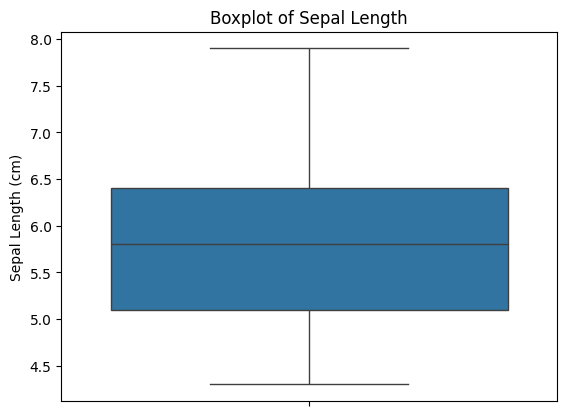

In [16]:
sns.boxplot(data=iris_df, y='SepalLengthCm')
plt.ylabel('Sepal Length (cm)')
plt.title('Boxplot of Sepal Length')
plt.show()




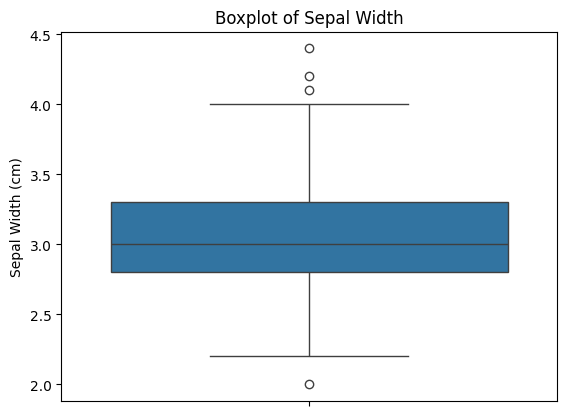

In [18]:
sns.boxplot(data=iris_df, y='SepalWidthCm')
plt.ylabel('Sepal Width (cm)')
plt.title('Boxplot of Sepal Width')
plt.show()


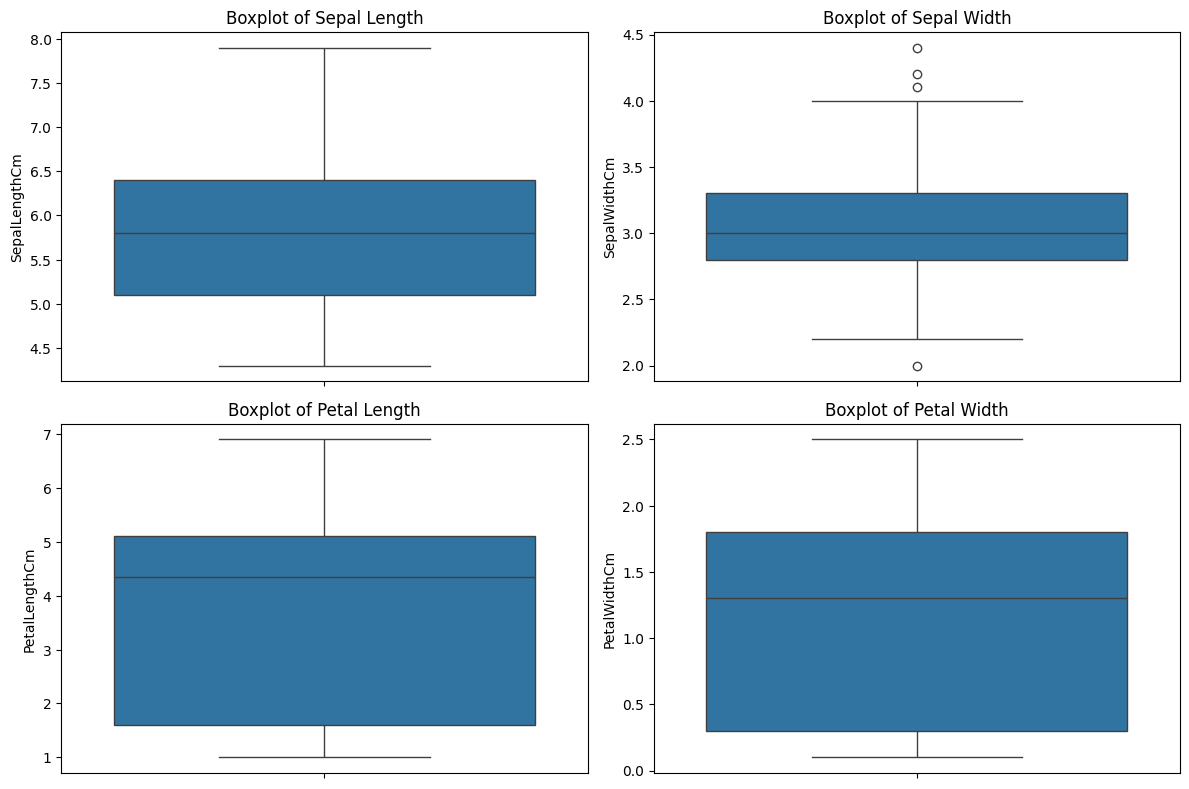

In [19]:
plt.figure(figsize=(12, 8))

# Boxplot for sepal length
plt.subplot(2, 2, 1)
sns.boxplot(data=iris_df, y='SepalLengthCm')
plt.title('Boxplot of Sepal Length')

# Boxplot for sepal width
plt.subplot(2, 2, 2)
sns.boxplot(data=iris_df, y='SepalWidthCm')
plt.title('Boxplot of Sepal Width')

# Boxplot for petal length
plt.subplot(2, 2, 3)
sns.boxplot(data=iris_df, y='PetalLengthCm')
plt.title('Boxplot of Petal Length')

# Boxplot for petal width
plt.subplot(2, 2, 4)
sns.boxplot(data=iris_df, y='PetalWidthCm')
plt.title('Boxplot of Petal Width')

plt.tight_layout()
plt.show()


# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

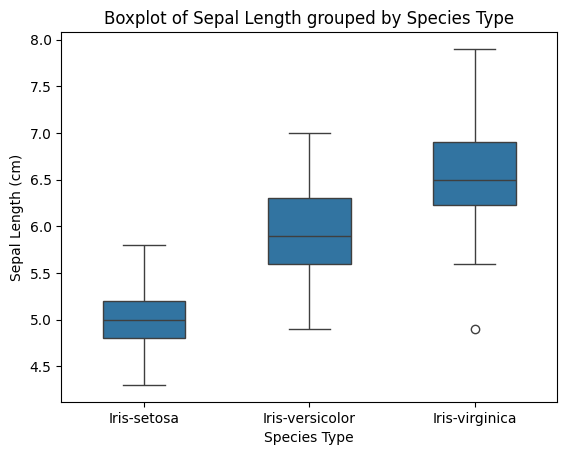

In [20]:
# Create side-by-side boxplots of the "SepalLengthCm" grouped by "Species"
sns.boxplot(data=iris_df, x='Species', y='SepalLengthCm', width=0.5, dodge=True)
plt.xlabel('Species Type')
plt.ylabel('Sepal Length (cm)')
plt.title('Boxplot of Sepal Length grouped by Species Type')
plt.show()


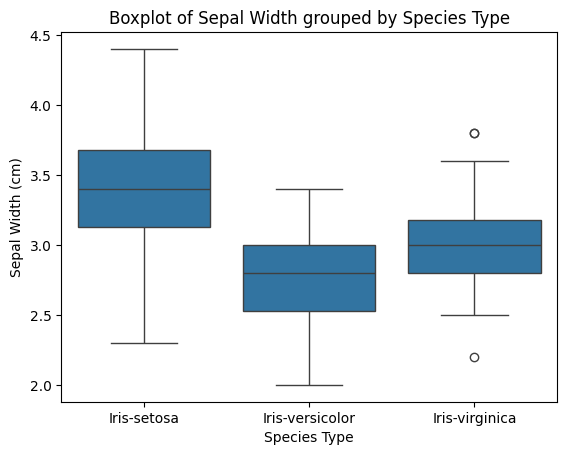

In [21]:
# Create side-by-side boxplots of the "SepalWidthCm" grouped by "Species"
sns.boxplot(data=iris_df, x='Species', y='SepalWidthCm')
plt.xlabel('Species Type')
plt.ylabel('Sepal Width (cm)')
plt.title('Boxplot of Sepal Width grouped by Species Type')
plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


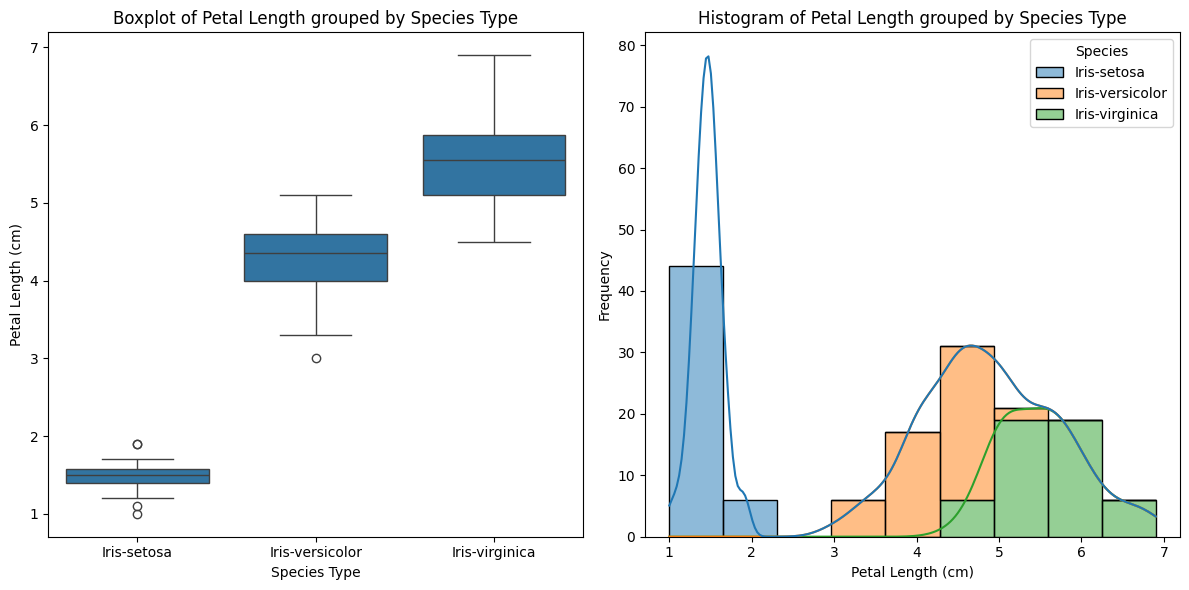

In [22]:
# Create a boxplot and histogram of the "PetalLengthCm" grouped by "Species"
# Boxplot of the PetalLengthCm grouped by Species
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=iris_df, x='Species', y='PetalLengthCm')
plt.xlabel('Species Type')
plt.ylabel('Petal Length (cm)')
plt.title('Boxplot of Petal Length grouped by Species Type')

# Histogram of the PetalLengthCm grouped by Species
plt.subplot(1, 2, 2)
sns.histplot(data=iris_df, x='PetalLengthCm', hue='Species', multiple='stack', kde=True)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length grouped by Species Type')

plt.tight_layout()
plt.show()




# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

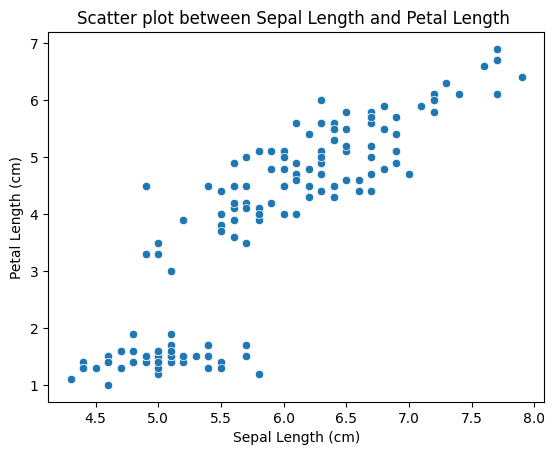

In [23]:
# Scatter plot between SepalLengthCm and PetalLengthCm
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='PetalLengthCm')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter plot between Sepal Length and Petal Length ')
plt.show()

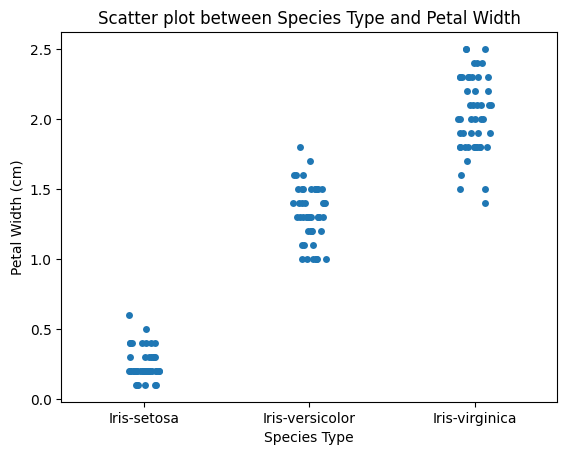

In [24]:
# Scatter plot between Species (categorical) and PetalWidthCm (numerical)
sns.stripplot(data=iris_df, x='Species', y='PetalWidthCm', jitter=True)
plt.xlabel('Species Type')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter plot between Species Type and Petal Width')
plt.show()

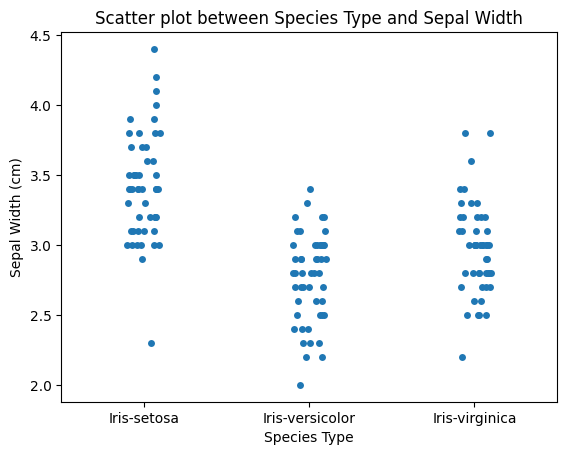

In [25]:
# Scatter plot between Species (categorical) and SepalWidthCm (numerical)
sns.stripplot(data=iris_df, x='Species', y='SepalWidthCm', jitter=True)
plt.xlabel('Species Type')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter plot between Species Type and Sepal Width')
plt.show()

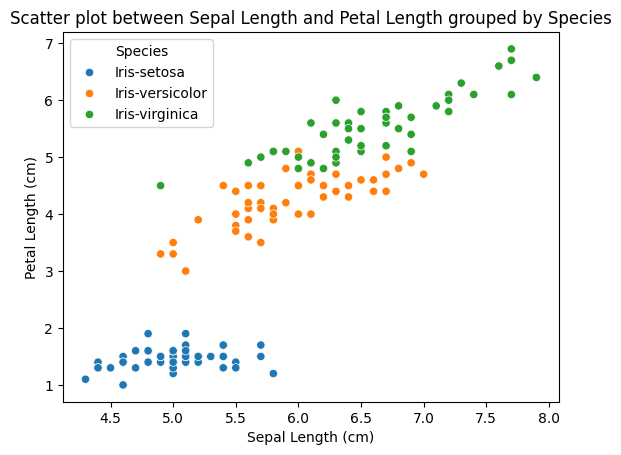

In [26]:
# Scatter plot between SepalLengthCm and PetalLengthCm grouped by Species
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter plot between Sepal Length and Petal Length grouped by Species')
plt.show()


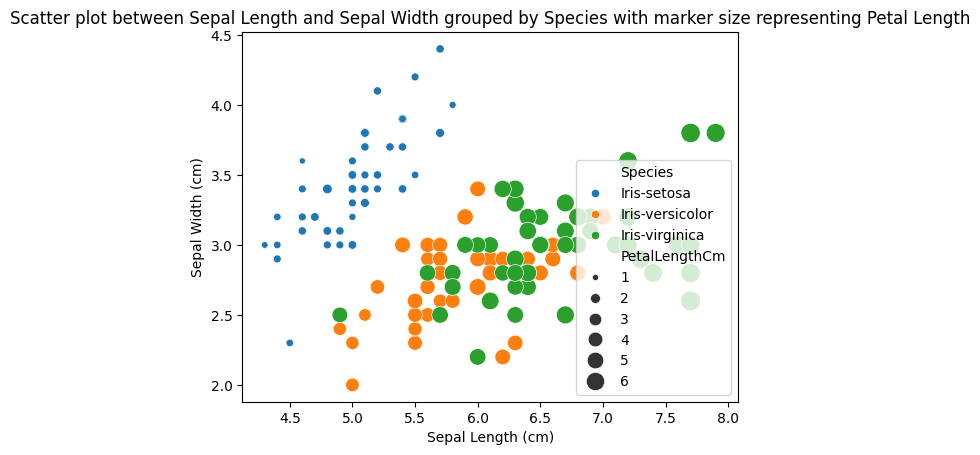

In [27]:
# Scatter plot between SepalLengthCm and SepalWidthCm grouped by Species with marker size representing PetalLengthCm
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', size='PetalLengthCm', sizes=(20, 200))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter plot between Sepal Length and Sepal Width grouped by Species with marker size representing Petal Length')
plt.show()

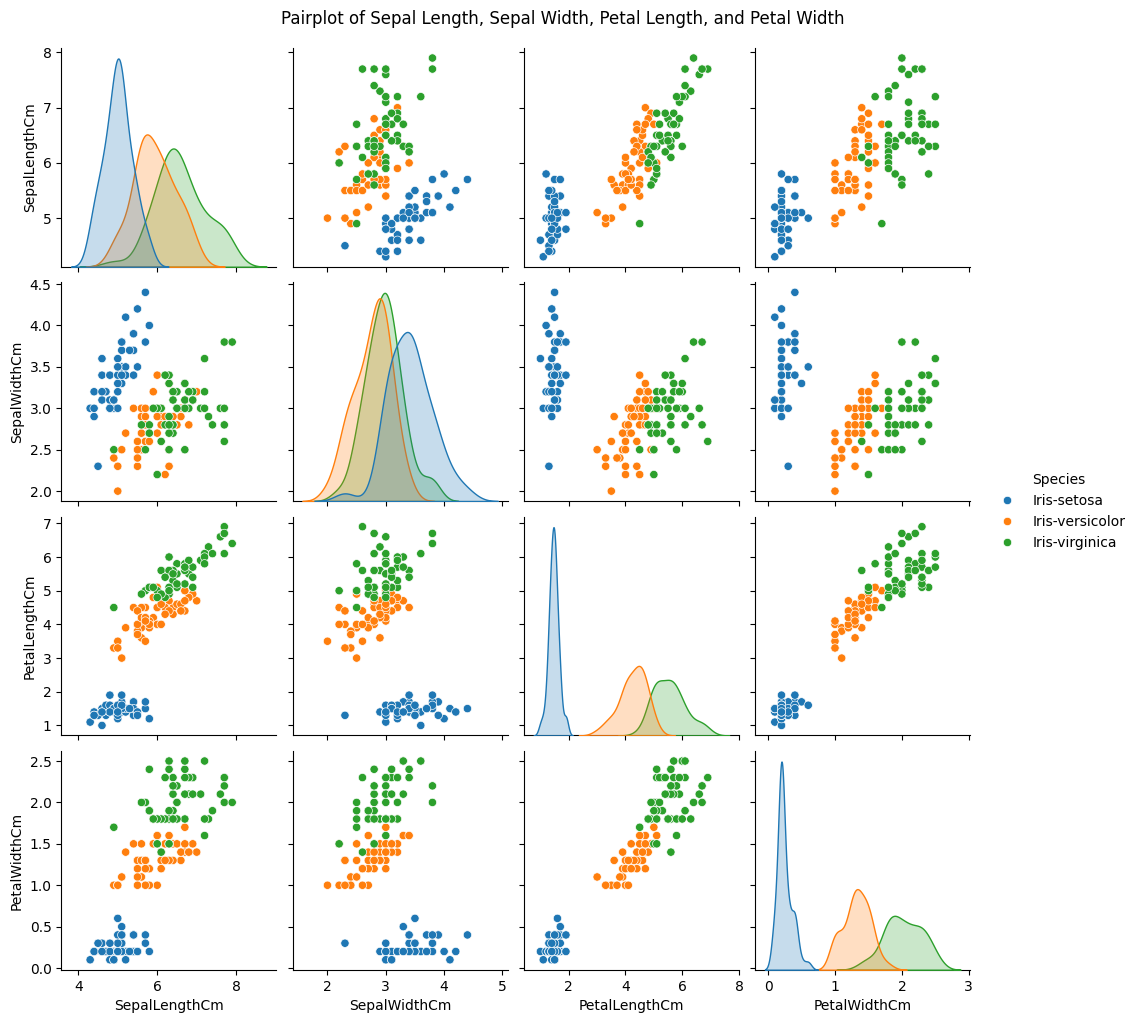

In [28]:
# Pairplot: Scatterplot of SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
sns.pairplot(iris_df, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Species')
plt.suptitle('Pairplot of Sepal Length, Sepal Width, Petal Length, and Petal Width', y=1.02)
plt.show()



# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


1. Plot the histograms for each of the four quantitative variables


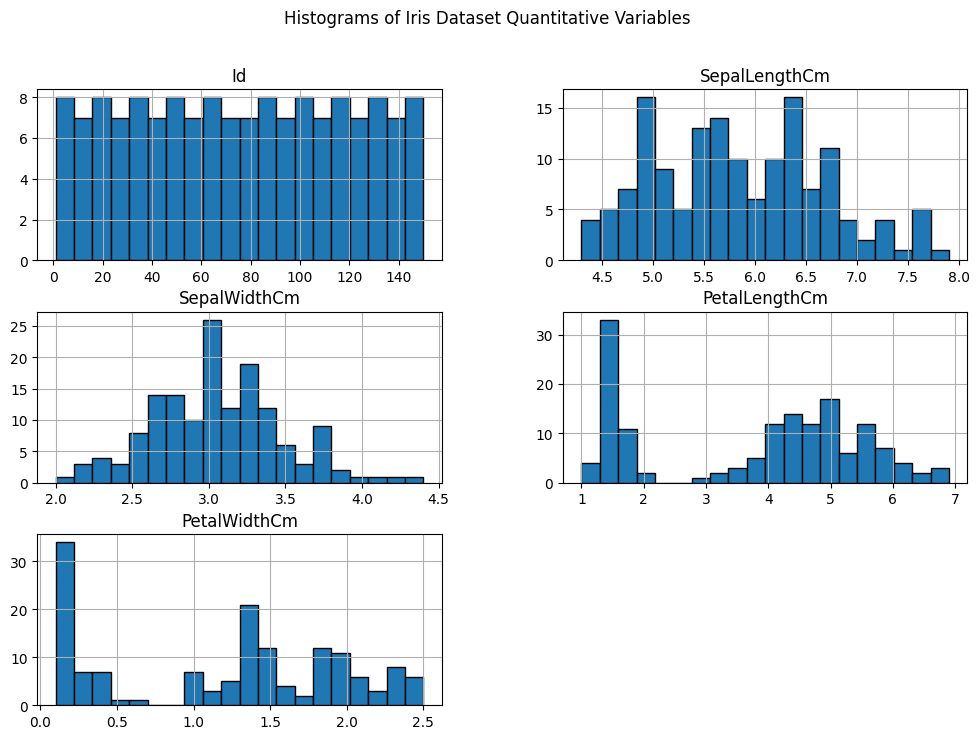

In [30]:
# Plot histograms for each quantitative variable
iris_df.hist(bins=20, figsize=(12, 8), layout=(3, 2), edgecolor='black')
plt.suptitle('Histograms of Iris Dataset Quantitative Variables')
plt.show()

2. Plot the histograms for each of the quantitative variables


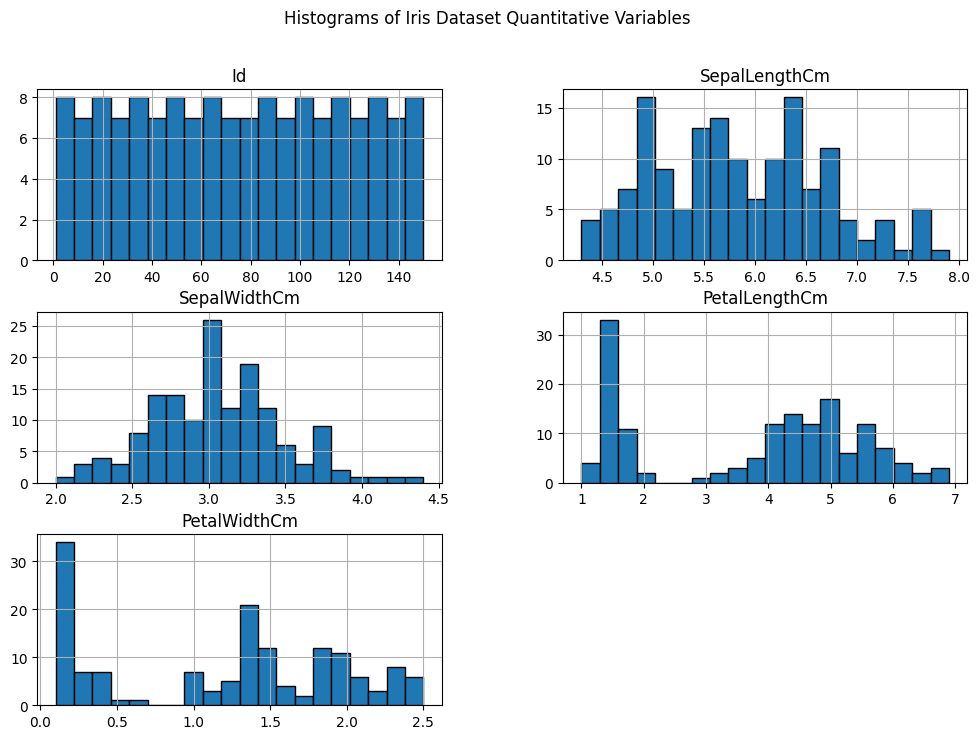

In [32]:
# Plot histograms for each quantitative variable
iris_df.hist(bins=20, figsize=(12, 8), layout=(3, 2), edgecolor='black')
plt.suptitle('Histograms of Iris Dataset Quantitative Variables')
plt.show()

3. Plot the boxplots for each of the quantitative variables


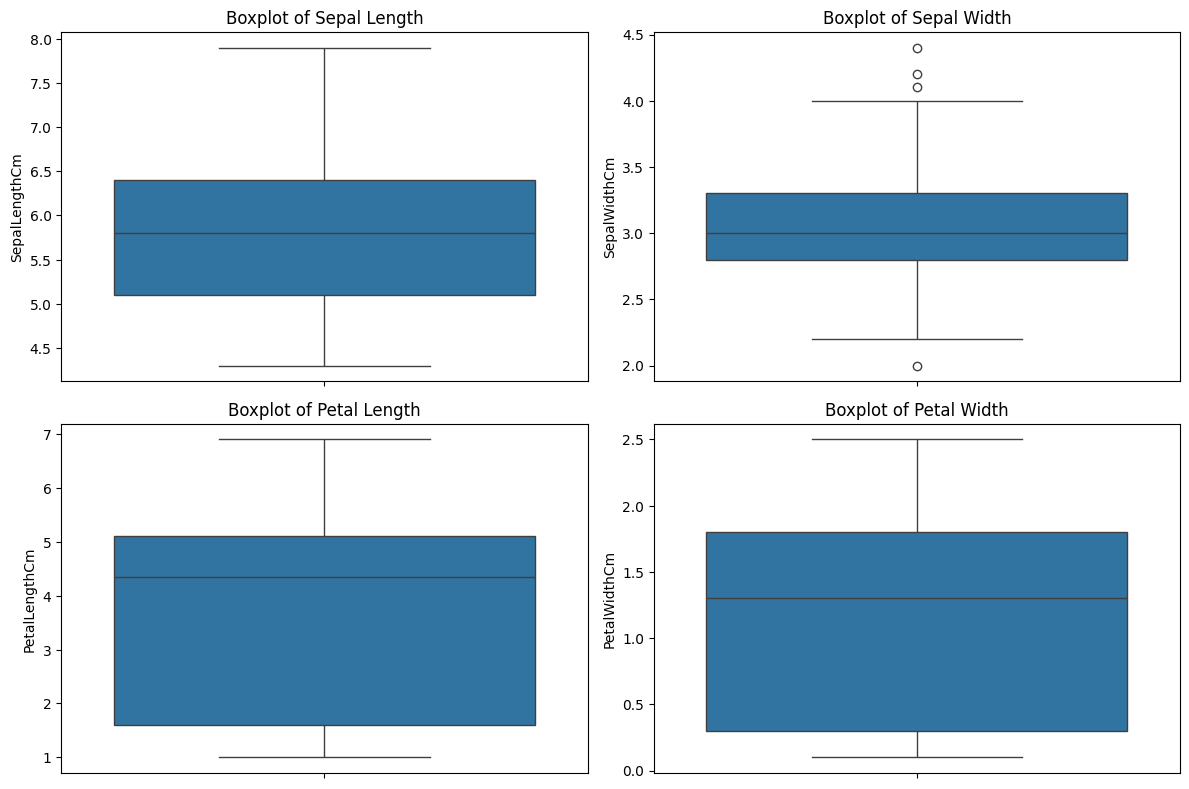

In [34]:
# Plot boxplots for each quantitative variable
plt.figure(figsize=(12, 8))

# Boxplot for sepal length
plt.subplot(2, 2, 1)
sns.boxplot(data=iris_df, y='SepalLengthCm')
plt.title('Boxplot of Sepal Length')

# Boxplot for sepal width
plt.subplot(2, 2, 2)
sns.boxplot(data=iris_df, y='SepalWidthCm')
plt.title('Boxplot of Sepal Width')

# Boxplot for petal length
plt.subplot(2, 2, 3)
sns.boxplot(data=iris_df, y='PetalLengthCm')
plt.title('Boxplot of Petal Length')

# Boxplot for petal width
plt.subplot(2, 2, 4)
sns.boxplot(data=iris_df, y='PetalWidthCm')
plt.title('Boxplot of Petal Width')

plt.tight_layout()
plt.show()

4. Plot the boxplots of the petal width grouped by type of flower


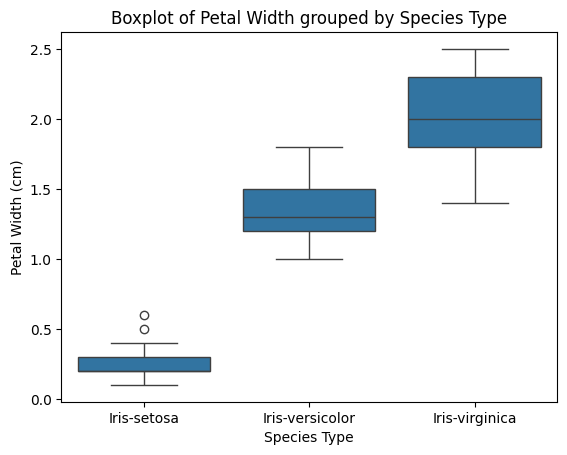

In [39]:
# Plot the boxplots of the petal width grouped by type of flower
sns.boxplot(data=iris_df, x='Species', y='PetalWidthCm')
plt.xlabel('Species Type')
plt.ylabel('Petal Width (cm)')
plt.title('Boxplot of Petal Width grouped by Species Type')
plt.show()

5. Plot the boxplots of the setal length grouped by type of flower


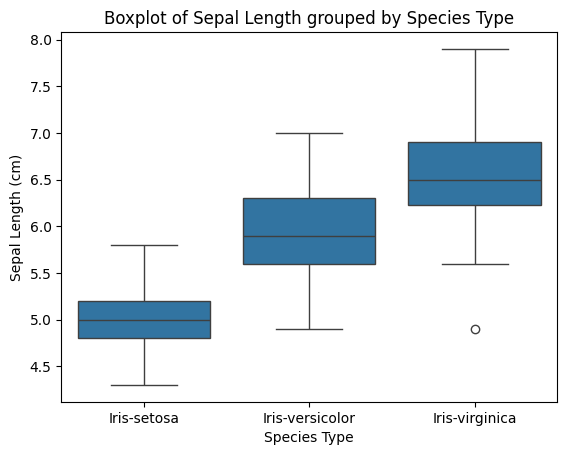

In [41]:
# Plot the boxplots of the sepal length grouped by type of flower
sns.boxplot(data=iris_df, x='Species', y='SepalLengthCm')
plt.xlabel('Species Type')
plt.ylabel('Sepal Length (cm)')
plt.title('Boxplot of Sepal Length grouped by Species Type')
plt.show()

6. Provide a description (explaination from your observations) of each of the quantitative variables


The Iris dataset consists of four quantitative variables: sepal length, sepal width, petal length, and petal width, all measured in centimeters. Sepal length ranges from 4.3 to 7.9 cm, with `Iris-setosa` generally having shorter sepals and `Iris-virginica` the longest. Sepal width ranges from 2.0 to 4.4 cm, where `Iris-setosa` tends to have wider sepals, while `Iris-virginica` has narrower ones. Petal length, ranging from 1.0 to 6.9 cm, and petal width, from 0.1 to 2.5 cm, are the most distinctive features, clearly separating the species. `Iris-setosa` has the smallest petals, while `Iris-virginica` has the largest, with `Iris-versicolor` falling between them, making these variables essential for classification.